In [107]:
# import stuff 
import numpy as np
import matplotlib.pyplot as plt
from p5control import DataGateway

In [108]:
# connetct to data server -> !!! bluefors_server.py has to be running !!!
dgw = DataGateway()
dgw.connect()

In [33]:
# get data
offset = dgw.get_data('/measurement/IV at base/offset/adwin')
sweep = dgw.get_data('/measurement/IV at base/sweep_1/adwin')

# calculate offest
off_V1 = np.mean(offset['V1'])
off_V2 = np.mean(offset['V2'])

# grab data & correct offset
t = sweep['time']
trigger = sweep['trigger']
V1 = sweep['V1'] - off_V1
V2 = sweep['V2'] - off_V2

# pay attention to amplifications
voltage = V1 / 1000 #FemtoB [V]
current = V2 / 100 * 100 / 47000 # FemtoA, VD, R_ref [A]

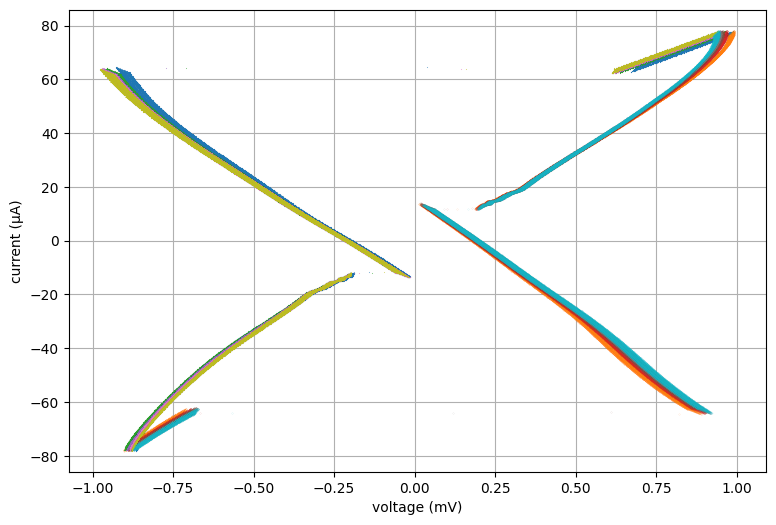

In [ ]:
# get copys of objects & shorter index
new_trig = np.copy(trigger)
new_time = np.copy(t)
new_index = np.arange(len(trigger)-1)

# with correct datatype set negative values to zero
new_trig = np.array(new_trig, dtype='float64')
new_trig[new_trig<1] = 0
# only interested in change: 0/1 -> subtract 
new_trig = new_trig % 2
new_trig = np.abs(new_trig[1:]-new_trig[:-1])

logic = new_trig>0
new_trig = new_trig[logic]
new_index = new_index[logic]

fig = plt.figure(figsize=(9,6))

for i in range(len(new_index)-1):    
    if i%2==0:
        up_voltage = voltage[new_index[i]:new_index[i+1]]
        up_current = current[new_index[i]:new_index[i+1]]

        plt.plot(up_voltage*1e3, up_current*1e6, 'x', ms=.1
) 
    if i%2==1:
        down_voltage = voltage[new_index[i]:new_index[i+1]]
        down_current = current[new_index[i]:new_index[i+1]]

        plt.plot(down_voltage*1e3, down_current*1e6, '.', ms=.1)

plt.xlabel('voltage (mV)')
plt.ylabel('current (µA)')

plt.plot(down_voltage*1e3, down_voltage*1e3*12.5)
plt.grid()


In [231]:
fit_up_voltage = np.copy(up_voltage)
fit_up_voltage = fit_up_voltage - fit_up_voltage + 0.5e-3

# plt.plot(up_voltage*1e3, up_current*1e6, '.', ms=.1)
# plt.plot(fit_up_voltage*1e3, up_current*1e6, '.', ms=.1)
# plt.grid(True)

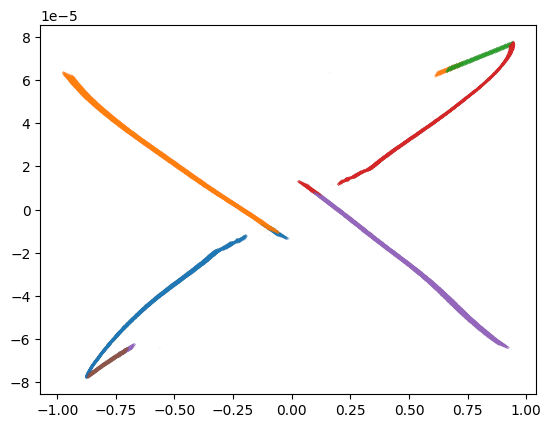

In [156]:
plt.plot(up_voltage[:13000]*1000, up_current[:13000], '.', ms=.1)
plt.plot(up_voltage[12500:27000]*1000, up_current[12500:27000], '.', ms=.1)
plt.plot(up_voltage[26500:]*1000, up_current[26500:], '.', ms=.1)
plt.plot(down_voltage[:13000]*1000, down_current[:13000], '.', ms=.1)
plt.plot(down_voltage[13000:27000]*1000, down_current[13000:27000], '.', ms=.1)
plt.plot(down_voltage[26500:]*1000, down_current[26500:], '.', ms=.1)

In [166]:
np.arange(-1,1,.1)

array([-1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -2.22044605e-16,  1.00000000e-01,
        2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
        6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01])

In [115]:
3%2

1

In [102]:
test = np.array([0, 5, 1, 2, 4, 1, 3])
x = np.where(test == 1)
y = int(x[0][0])
print(x)

(array([2, 5], dtype=int64),)


In [70]:
type(test)

numpy.ndarray

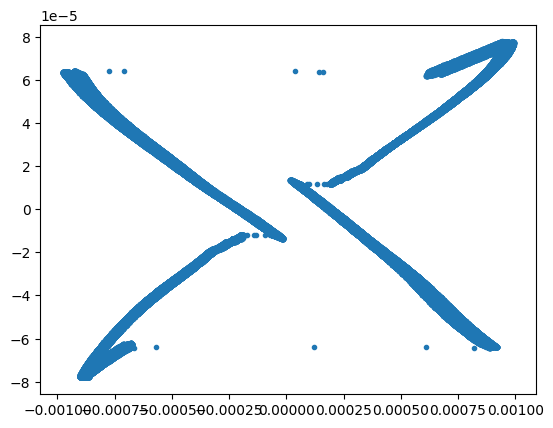

In [121]:
plt.plot(voltage, current, '.')

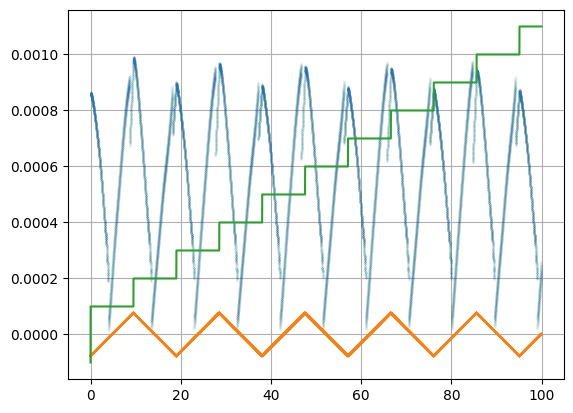

In [230]:
plt.plot(t-t[0], np.abs(voltage), '.', ms=.01)
plt.plot(t-t[0], current)
plt.plot(t-t[0], trigger/1e4)
plt.grid(True)

#plt.xlim(0,20)

#t_data = np.arange(4.5,8,.1)
#plt.plot(t_data, 0.2e-3*t_data - 0.75e-3, 'x')

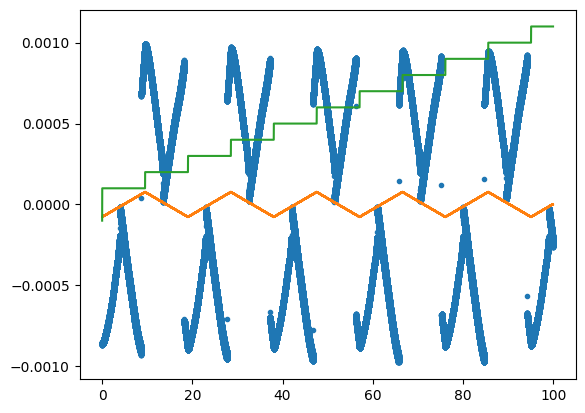

In [182]:
plt.plot(t-t[0], voltage, '.')
plt.plot(t-t[0], current)
plt.plot(t-t[0], trigger/1e4)